# Data-Driven Insights into Amazon Customer Reviews
Introduction:
The following analysis delves into a comprehensive dataset of Amazon customer reviews to extract meaningful insights that can inform business strategies, enhance customer satisfaction, and optimize product recommendations. By employing advanced data manipulation and analysis techniques using Python, the project aims to understand customer behaviors, preferences, and overall sentiment towards products sold on Amazon.

Detailed Explanation:
Data Acquisition and Cleansing:
The project begins with the acquisition of data from a SQLite database, containing extensive records of customer reviews. The initial phase involves cleaning the data to ensure accuracy and reliability for the analysis. This includes removing entries where the helpfulness numerator exceeds the denominator and addressing any duplicate entries to maintain the integrity of the dataset.

Exploratory Data Analysis (EDA):
Comprehensive exploratory analysis is conducted to summarize the main characteristics of the dataset through visualizations and statistics. This phase helps in understanding the distribution of ratings, identifying the most reviewed products, and examining the frequency of purchases by individual users, which aids in spotting potential frequent reviewers.

Sentiment Analysis:
To gauge the sentiment embedded within the review summaries, sentiment analysis is performed using the TextBlob library. This process assigns a polarity score to each review, classifying them into positive, neutral, or negative categories. The sentiment analysis provides profound insights into customer emotions and satisfaction levels, which are crucial for enhancing product listings and customer service practices.

Behavioral Analysis:
The project also investigates differences in behavior between frequent and occasional reviewers. By comparing their review lengths and sentiment, it can be inferred whether frequent reviewers tend to provide more detailed feedback or express distinct sentiment tendencies compared to their less frequent counterparts.

Visualization:
Visual representations of data are utilized extensively to provide a clear and intuitive understanding of the findings. Graphs and charts are used to depict the distribution of review scores, the relationship between review helpfulness and product ratings, and the sentiment polarity of reviews.


This detailed analysis of Amazon customer reviews using data-driven techniques provides valuable insights that can help Amazon and its sellers to better understand customer needs and preferences. By leveraging these insights, they can improve their product offerings, tailor their marketing strategies, and ultimately enhance customer satisfaction and loyalty. This project not only demonstrates the power of data in understanding consumer behavior but also highlights the potential for businesses to adapt and thrive in an ever-changing market environment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data from sqlite database

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r"C:\Users\Vijay\Downloads\Project 3.. Amazon Customers Data Analysis-20230628T212107Z-001\Project 3.. Amazon Customers Data Analysis\database.sqlite")

In [4]:
type(con)

sqlite3.Connection

In [5]:
df = pd.read_sql_query('select * from reviews', con)

In [6]:
df.shape

(568454, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Data Preparation

In [9]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [10]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [11]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']] ## invalid row

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [12]:
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']] ## invalid row

In [13]:
df_valid.shape

(568452, 10)

In [14]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [15]:
df_valid[df_valid.duplicated(['UserId', 'ProfileName', 'Time','Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [16]:
data = df_valid.drop_duplicates(subset=['UserId', 'ProfileName', 'Time','Text'])

In [17]:
data.shape

(393931, 10)

In [18]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [19]:
data['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 393931, dtype: int64

In [20]:
data['Time'] = pd.to_datetime(data['Time'],unit='s')

C:\Users\Pratibha\AppData\Local\Temp/ipykernel_26400/3345079465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = pd.to_datetime(data['Time'],unit='s')


In [21]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Analyze to what User Amazon Can recommend more product?


In [22]:
data['ProfileName'].nunique()

218418

In [23]:
data['UserId'].nunique()

256059

In [24]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [25]:
recommend_df = data.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='ProductId',ascending=False)

In [26]:
recommend_df

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [27]:
recommend_df.columns = ['Number_of_summaries','num_text','avg_score','No_of_prod_Purchased']

In [28]:
recommend_df

,Number_of_summaries,num_text,avg_score,No_of_prod_Purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [29]:
recommend_df.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [30]:
recommend_df['No_of_prod_Purchased'][0:10].values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118], dtype=int64)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

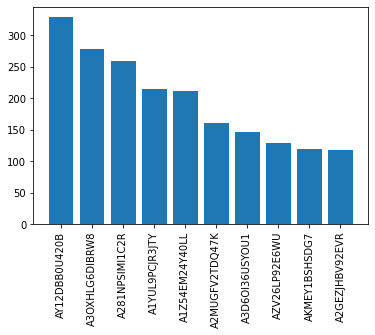

In [31]:
plt.bar(recommend_df.index[0:10],recommend_df['No_of_prod_Purchased'][0:10].values)
plt.xticks(rotation = 'vertical')

# Which product has good number of reviews

In [32]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [33]:
len(data['ProductId'].unique())

67624

In [34]:
prod_count = data['ProductId'].value_counts().to_frame()

In [35]:
prod_count

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1
B009858H6M,1


In [36]:
prod_count['ProductId']>500

B007JFMH8M     True
B002QWP89S     True
B003B3OOPA     True
B001EO5Q64     True
B0013NUGDE     True
              ...  
B002DNX4GO    False
B000FM2YU2    False
B001M1VA32    False
B009858H6M    False
B001LR2CU2    False
Name: ProductId, Length: 67624, dtype: bool

In [37]:
freq_prod_ids = prod_count[prod_count['ProductId']>500].index

In [38]:
data['ProductId'].isin(freq_prod_ids)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393931, dtype: bool

In [39]:
fre_prod_df = data[data['ProductId'].isin(freq_prod_ids)]

In [40]:
fre_prod_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


<AxesSubplot:xlabel='count', ylabel='ProductId'>

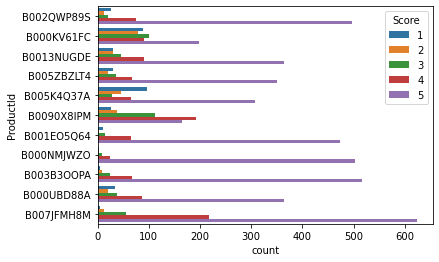

In [41]:

sns.countplot(y='ProductId',data = fre_prod_df, hue='Score')

# Is there any difference between behaviour of frequent viewers & not frequent viewer

In [42]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [43]:
x = data['UserId'].value_counts()

In [44]:
data['viewer type'] = data['UserId'].apply(lambda user : 'Frequent' if x[user] > 50 else 'Not frequent')

In [45]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not frequent


In [46]:
data['viewer type'].unique()

array(['Not frequent', 'Frequent'], dtype=object)

In [47]:
not_freq_df =data[data['viewer type']=='Not frequent']
freq_df =data[data['viewer type']== 'Frequent']

<AxesSubplot:>

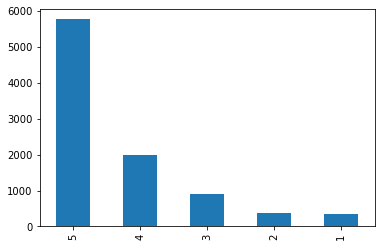

In [48]:

freq_df['Score'].value_counts().plot(kind = 'bar')

In [49]:
freq_df['Score'].value_counts()/len(freq_df)*100

5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: Score, dtype: float64

In [50]:
not_freq_df['Score'].value_counts()/len(not_freq_Df)*100

NameError: name 'not_freq_Df' is not defined

In [ ]:
not_freq_df['Score'].value_counts().plot(kind = 'bar')

# Are frequent user more verbose

In [ ]:
data.columns

In [ ]:
data[['UserId','ProductId','Text']]

In [ ]:
len(data['Text'][0].split(' '))

In [ ]:
def calculate_length(text):
    return len(text.split(' '))

In [ ]:
data['text_length'] = data['Text'].apply(calculate_length)

In [ ]:
data.head(3)

In [ ]:
not_freq_data =data[data['viewer type']=='Not frequent']
freq_data =data[data['viewer type']== 'Frequent']

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.boxplot(freq_data['text_length'])
ax1.set_xlabel('Freq of freq reviewer')
ax1.set_ylim(0,600)

ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_data['text_length'])
ax2.set_xlabel('Freq of not freq reviewer')
ax2.set_ylim(0,600)


# Sentiment Analysis

In [ ]:
#there are various packages which can help in sentimate analysis one of the packages are textblob
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob(data['Summary'][0]).sentiment.polarity

In [ ]:
data.shape

In [ ]:
sample = data[0:50000]

In [ ]:
polarity = []

for text in sample['Summary']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [ ]:
len(polarity)

In [ ]:
sample['polarity'] = polarity

In [ ]:
sample.head(2)

In [ ]:
sample_negative = sample[sample['polarity']<0]

sample_positive = sample[sample['polarity']>0]

In [ ]:
from collections import Counter

In [ ]:
Counter(sample_negative['Summary']).most_common(10)

In [ ]:
Counter(sample_positive['Summary']).most_common(10)

s